In [1]:
#Importing module
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Loading the data
df = pd.read_csv("usage_data.csv")
print(df.head())

         Date Username        Feature  Sessions  Time spent  \
0  2017-06-01  kwalter      Reporting        14        23.0   
1  2017-06-01    kcarr        Roadmap        17        55.0   
2  2017-06-01  cstuart     Automation        13         2.0   
3  2017-06-01  mkelley  Task Creation        14        18.0   
4  2017-06-02  edillon  Task Creation        17        13.0   

   Average time spent  
0            1.642857  
1            3.235294  
2            0.153846  
3            1.285714  
4            0.764706  


In [3]:
#Analysing the dataset for any Null values
has_nulls = df.isnull().values.any()

if has_nulls:
  print("The dataset contains null values.")
else:
  print("The dataset does not contain null values.")

The dataset does not contain null values.


In [4]:
#Analysing descriptive statistics
df.describe()

,Sessions,Time spent,Average time spent
count,10575.000000,10575.000000,10575.000000
mean,14.410213,23.683625,1.875051
std,3.252482,13.598790,1.707132
min,3.000000,0.000000,0.000000
25%,13.000000,15.000000,1.000000
50%,15.000000,21.000000,1.466667
75%,16.000000,30.000000,2.187500
max,22.000000,60.000000,20.000000


In [5]:
#converting date field to datetime object
df['Date'] = pd.to_datetime(df['Date'])

#converting time spent to hours
df['time_spent_in_hours'] = df['Time spent']/60

In [6]:
#Extracting Month and Year to create respective columns
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [7]:
#Grouping by year and month to find the total time spent
monthly_usage = df.groupby(['year', 'month'])['time_spent_in_hours'].sum().reset_index()
print(monthly_usage)

    year  month  time_spent_in_hours
0   2017      6            58.650000
1   2017      7            65.266667
2   2017      8            57.700000
3   2017      9            61.516667
4   2017     10            60.150000
..   ...    ...                  ...
63  2022      9            49.500000
64  2022     10            54.033333
65  2022     11            49.700000
66  2022     12            53.300000
67  2023      1            52.433333

[68 rows x 3 columns]


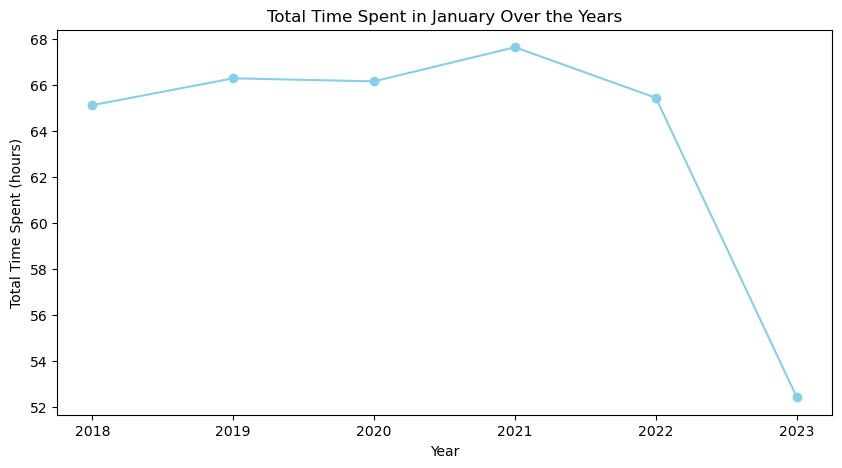

In [8]:
#Filtering for January data
january_usage = monthly_usage[monthly_usage['month'] == 1]

#Settinf plot size
plt.figure(figsize=(10, 5))

#Creating line plot for January usage over the years
plt.plot(january_usage['year'], january_usage['time_spent_in_hours'], marker='o', linestyle='-', color='skyblue')
plt.title('Total Time Spent in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Time Spent (hours)')
plt.show()


#### Product feauture usage analysis

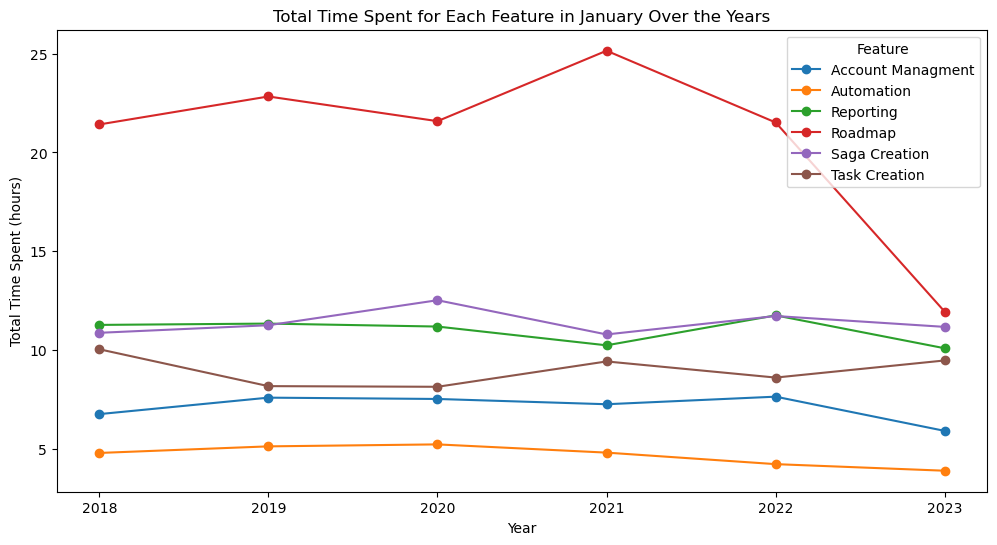

In [9]:
#Filtering January data
january_data = df[df['month'] == 1]

#Grouping by year and feature to find the total time spent
january_feature_usage = january_data.groupby(['year', 'Feature'])['time_spent_in_hours'].sum().reset_index()

#Creating Visualisation
plt.figure(figsize=(12, 6))

#Plotting data for each feature
for feature in january_feature_usage['Feature'].unique():
    # Filter data for the specific feature
    feature_data = january_feature_usage[january_feature_usage['Feature'] == feature]
    # Plot the data
    plt.plot(feature_data['year'], feature_data['time_spent_in_hours'], marker='o', label=feature)


plt.title('Total Time Spent for Each Feature in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Time Spent (hours)')
plt.legend(title='Feature', loc='upper right')
plt.show()


In [10]:
#Filtering for "Roadmap" feature
roadmap_data = january_data[january_data['Feature'] == 'Roadmap']

User Usage Statistics for 'Roadmap' Feature in January Over the Years:
      count      mean       std  min  25%  50%       75%       max
year                                                              
2018   80.0  0.267708  0.446114  0.0  0.0  0.0  0.754167  1.800000
2019   80.0  0.285417  0.460182  0.0  0.0  0.0  0.783333  1.633333
2020   80.0  0.269792  0.436382  0.0  0.0  0.0  0.708333  1.600000
2021   80.0  0.314375  0.477141  0.0  0.0  0.0  0.800000  2.416667
2022   80.0  0.268958  0.450174  0.0  0.0  0.0  0.720833  1.783333
2023   80.0  0.149167  0.258660  0.0  0.0  0.0  0.350000  0.850000

Users with Significant Changes in Usage:
year            2018      2019      2020      2021      2022      2023
Username                                                              
ablackwell  0.000000  0.000000  0.816667  0.000000  0.000000  0.000000
acombs      0.000000  0.816667  0.000000  0.000000  0.000000  0.000000
acox        0.000000  0.883333  0.000000  0.000000  0.966667  0.000

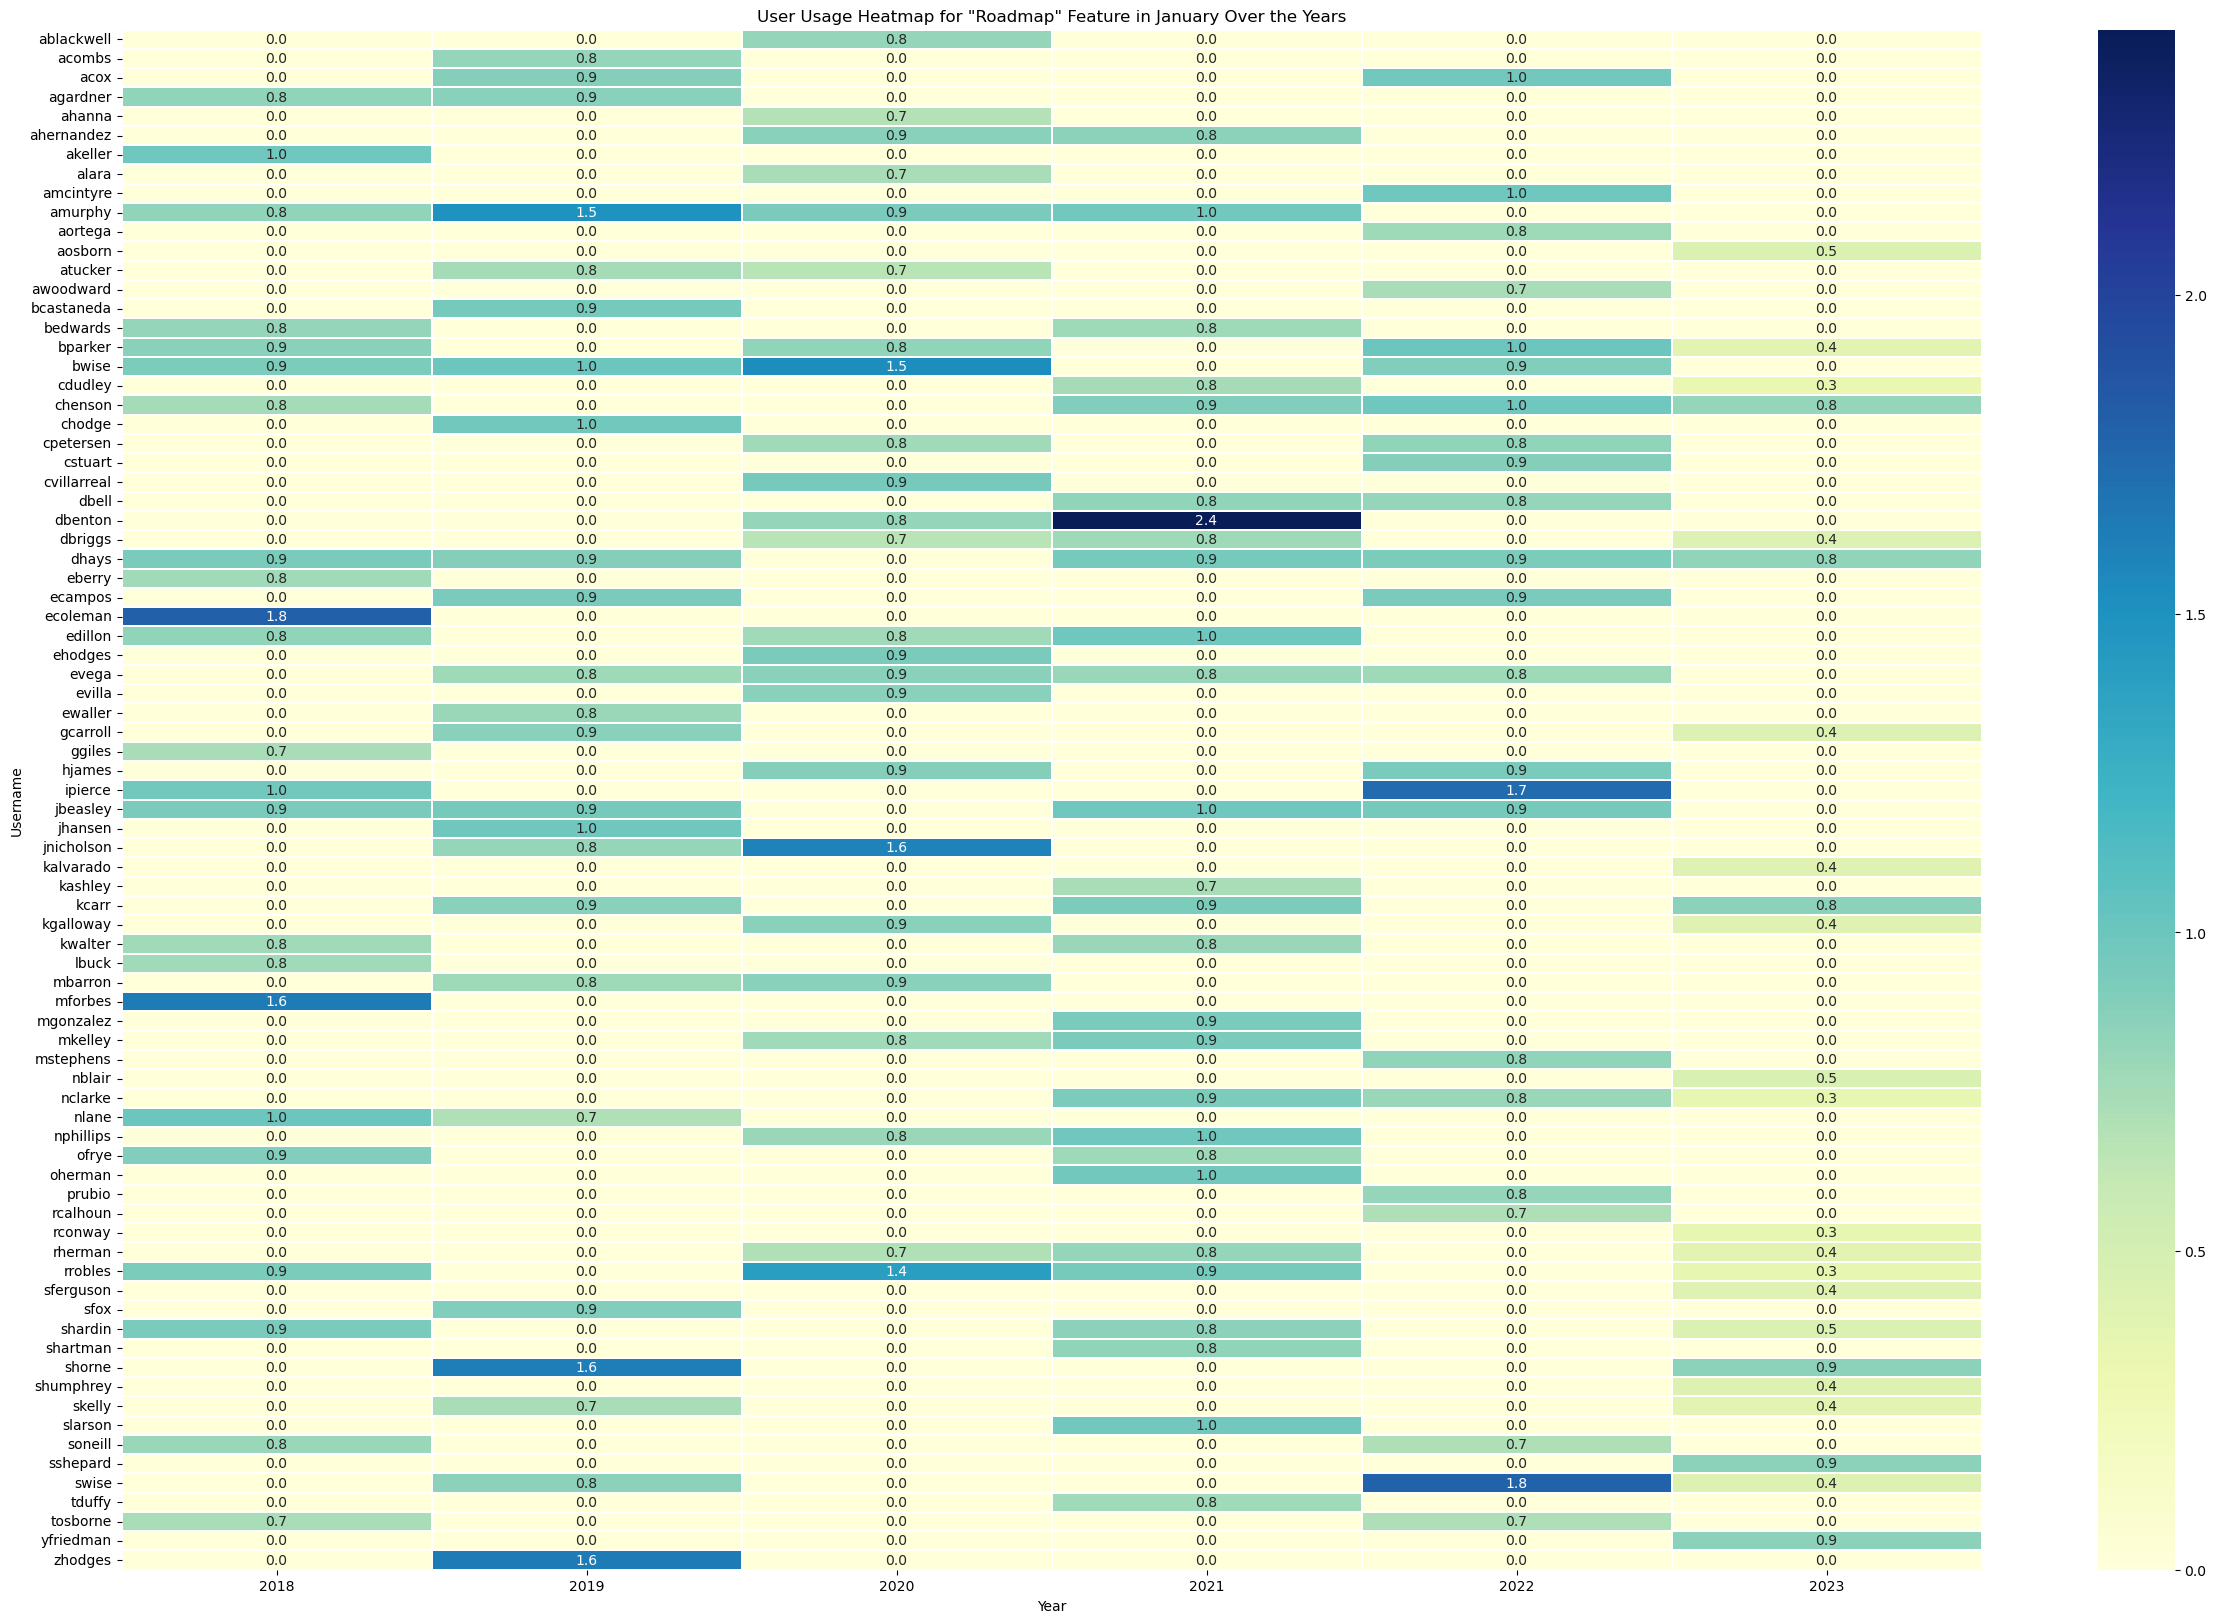

In [11]:
#User Analysis: Aggregate Data
user_usage = roadmap_data.groupby(['year', 'Username'])['time_spent_in_hours'].sum().reset_index()

#Pivoting data to have years as columns and usernames as rows
user_usage_pivot = user_usage.pivot(index='Username', columns='year', values='time_spent_in_hours').fillna(0)

#Calculating overall statistics for each user
user_usage_stats = user_usage_pivot.describe().transpose()
print("User Usage Statistics for 'Roadmap' Feature in January Over the Years:")
print(user_usage_stats)

#Identifying users with significant changes
significant_users = user_usage_pivot.loc[(user_usage_pivot.diff(axis=1).abs() > 0.5).any(axis=1)]
print("\nUsers with Significant Changes in Usage:")
print(significant_users)

# Heatmap Visualization
plt.figure(figsize=(30, 20))
sns.heatmap(user_usage_pivot, cmap='YlGnBu', linewidths= 0.2, annot=True, fmt=".1f", annot_kws={"size": 10})  # Adjust font size and format
plt.title('User Usage Heatmap for "Roadmap" Feature in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Username')
plt.show()

#### Session Analysis

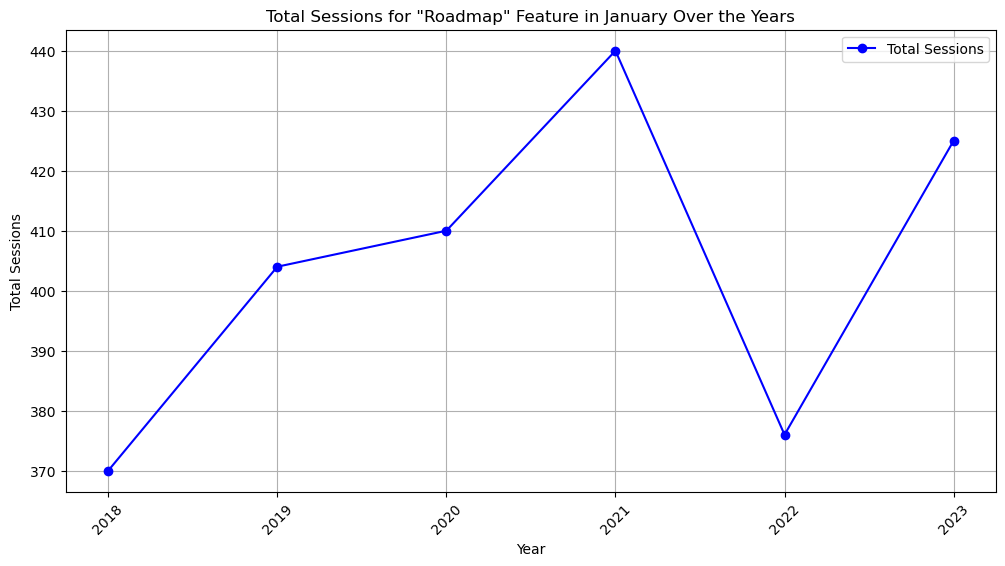

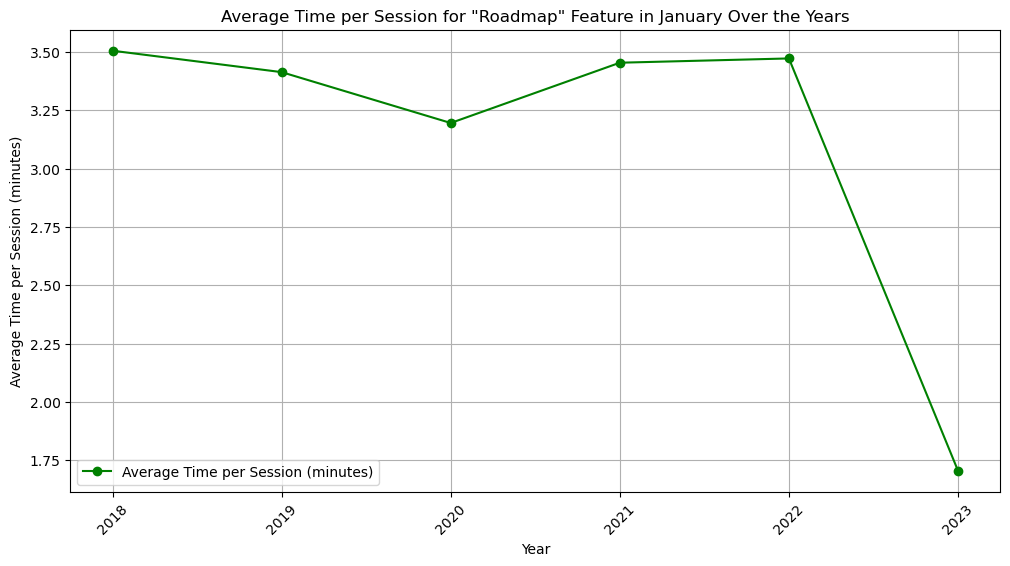

In [12]:
#Grouping by year to find the total sessions and average session time for "Roadmap"
session_analysis = roadmap_data.groupby(['year']).agg(
    total_sessions=('Sessions', 'sum'),
    total_time_spent=('time_spent_in_hours', 'sum'),
    average_time_per_session=('Average time spent', 'mean')
).reset_index()

# Plotting Total Sessions
plt.figure(figsize=(12, 6))
plt.plot(session_analysis['year'], session_analysis['total_sessions'], marker='o', linestyle='-', color='b', label='Total Sessions')
plt.title('Total Sessions for "Roadmap" Feature in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting Average Time per Session
plt.figure(figsize=(12, 6))
plt.plot(session_analysis['year'], session_analysis['average_time_per_session'], marker='o', linestyle='-', color='g', label='Average Time per Session (minutes)')
plt.title('Average Time per Session for "Roadmap" Feature in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Time per Session (minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### Proposed Metrics for Monitoring
To better track usage performance going forward, the following metrics can be monitored:

- Monthly Active Users (MAU): Track the number of unique users engaging with the platform each month.
- Feature Usage Time: Monitor the total time spent on each feature to identify trends and potential issues.
- Session Duration: Track the average session duration to understand user engagement levels.
- Feature-Specific Metrics: Monitor usage metrics specific to key features such as "Roadmap", "Reporting", etc.
- User Engagement: Track the engagement levels of key users or user groups to identify potential drops in activity.